In [1]:
#from styleframe import StyleFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Done')
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  # dimensional reduction
import umap  # dimensional reduction, clustering, & visualization
from sklearn.manifold import TSNE  # clustering, & visualization
import statistics

Done


In [2]:
ad1_p1_50 = 'FinalTable AD Chip1 Protein1-50 Area1-210.xlsx'
ad1_p51_100 = 'FinalTable AD Chip1 Protein 51-100 Area1-210 458 number.xlsx'
ad1_p101_150 = 'FinalTable AD Chip1 Protein101-150 Area1-210.xlsx'
ad1_p151_200 = 'FinalTable AD Chip1 Protein 151_200 Area1-210.xlsx'

ad2_p1_50 = 'FinalTable AD Chip2 Protein1-50 Area1_210.xlsx'
ad2_p51_100 = 'FinalTable AD Chip2 Protein 51-100 Area1-210 372 number.xlsx'
ad2_p101_150 = 'FinalTable AD Chip2 Protein 101_150 Area1-210.xlsx'
ad2_p151_200 = 'FinalTable AD Chip2 Protein 151_200 Area1-210.xlsx'

wt1_p1_50 = 'FinalTable WT Chip1 Protein1_50 Area1-210.xlsx'
wt1_p51_100 = 'FinalTable WT Chip1 Protein 51_100 Area1-210 453 number.xlsx'
wt1_p101_150 = 'FinalTable WT Chip1 Protein101-150_Area1-210.xlsx'
wt1_p151_200 = 'FinalTable WT Chip1 Protein151-200 Area1-210.xlsx'

wt2_p1_50 = 'FinalTable WT Chip2 Protein1-50 Area1-180.xlsx'
wt2_p51_100 = 'FinalTable WT Chip2 Protein 51_100 Area1-180 403 number.xlsx'
wt2_p101_150 = 'FinalTable WT Chip2 Protein101-150 Area1-180.xlsx'
wt2_p151_200 = 'FinalTable WT Chip2 Protein151-200 Area1-180.xlsx'

ad1 = 'AD chip 1.xlsx'
ad2 = 'AD chip 2.xlsx'
wt1 = 'WT chip 1.xlsx'
wt2 = 'WT chip 2.xlsx'

In [3]:
def sc_from_data(xlsx_data):
    # getting single cell and baseline data from 'cell number' column
    
    df = pd.read_excel(xlsx_data)
    singlecells = pd.DataFrame(columns=df.columns)
    
    sc_row = df.loc[df['Cell number'] == 1.0]
    singlecells = singlecells.append(sc_row, ignore_index=True)
    singlecells = singlecells.drop(columns=['Cell number', 'Row'])
    
    return singlecells.columns, singlecells


def bl_from_data(xlsx_data):
    # getting single cell and baseline data from 'cell number' column
    
    df = pd.read_excel(xlsx_data)
    baseline = pd.DataFrame(columns=df.columns)
    
    bl_row = df.loc[df['0 Cell number'] == 1.0]
    baseline = baseline.append(bl_row, ignore_index=True)
    baseline = baseline.drop(columns=['0 Cell number', '1 Cell number', 'Row'])
    
    return baseline

In [4]:
col, ad1_sc = sc_from_data(ad1)
_, ad2_sc = sc_from_data(ad2)
_, wt1_sc = sc_from_data(wt1)
_, wt2_sc = sc_from_data(wt2)

ad1_bl_p1_50 = bl_from_data(ad1_p1_50)
ad1_bl_p51_100 = bl_from_data(ad1_p51_100)
ad1_bl_p101_150 = bl_from_data(ad1_p101_150)
ad1_bl_p151_200 = bl_from_data(ad1_p151_200)

ad2_bl_p1_50 = bl_from_data(ad2_p1_50)
ad2_bl_p51_100 = bl_from_data(ad2_p51_100)
ad2_bl_p101_150 = bl_from_data(ad2_p101_150)
ad2_bl_p151_200 = bl_from_data(ad2_p151_200)

wt1_bl_p1_50 = bl_from_data(wt1_p1_50)
wt1_bl_p51_100 = bl_from_data(wt1_p51_100)
wt1_bl_p101_150 = bl_from_data(wt1_p101_150)
wt1_bl_p151_200 = bl_from_data(wt1_p151_200)

wt2_bl_p1_50 = bl_from_data(wt2_p1_50)
wt2_bl_p51_100 = bl_from_data(wt2_p51_100)
wt2_bl_p101_150 = bl_from_data(wt2_p101_150)
wt2_bl_p151_200 = bl_from_data(wt2_p151_200)

In [5]:
# preprocessing

def convert_to_binary(data):
    # changes string data to numeric data
    # input data.column
    
    string = list(set(data))
    num_string = len(data.value_counts())
    
    sub = {}
    for x in range(num_string):
        key = string[x]
        value = x
        sub[key] = value
        
    data = [sub[x] for x in data]
    
    return sub, data

def Normalize(data):
    data = data.dropna(axis=0, how='any')
    data_scaled = normalize(data)
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
    return data_scaled

In [6]:
# make dataframe with datasets as labels

def data_df(data):
    # data is a list of all sc data
    
    columns = ['Label'] + list(data[0].columns)

    new = pd.DataFrame(columns=columns)
    
    n_col = len(columns)
    start_row = 0
    a = ['AD1', 'AD2', 'WT1', 'WT2']
    for j in range(len(data)):
        n_row = len(data[j][columns[1]])
        label = a[j]
        
        for i in range(n_row):
            new = new.append({'Label': label}, ignore_index=True)
            
        for i in range(n_col-1):
            col_name = new.columns[i+1]
            new[col_name][start_row:start_row+n_row] = data[j][col_name][0:n_row]
        start_row += n_row

    return new

raw_sc = data_df([ad1_sc, ad2_sc, wt1_sc, wt2_sc])
error = [raw_sc.columns[15], raw_sc.columns[16], raw_sc.columns[29], raw_sc.columns[85], raw_sc.columns[87], 
             raw_sc.columns[91], raw_sc.columns[97], raw_sc.columns[101], raw_sc.columns[105], raw_sc.columns[170], 
             raw_sc.columns[175], raw_sc.columns[178], raw_sc.columns[179], raw_sc.columns[180], raw_sc.columns[185], 
             raw_sc.columns[188], raw_sc.columns[189]]
sc = raw_sc.drop(columns=error)
new_col = sc.columns[1:len(sc.columns)]
sc

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligodendrocyte Marker O4  RHOA TNFR1  Rac1  NOL3  \
0             1760                      1760  2015  1915  1800  1840   
1             1990                      2040  2230  1975  2810  2275   
2             1970                      2110  2105  1905  1840  1950   
3             2150                      2205  2440  2120  3230  2470   
4             1930                      1925  2000  1930  2055  2080   
...            ...                       ...   ...   ...   ...   ...   
1593          1995                      2010  2145  1985  2790  2125   
1594          1955                      1965  2015  1940  1970  1995   
1595          1940                      1940  1965  1950  1955  1995   
1596          1855                      1905  2150  2000  1940  2015   
1597          1975                      2010  2075  2000  2065  2065   

     PI3K p85α 4EBP1 SIRT1   JNK  
0         1810  1800  1810  1820  
1         1990  2050  2275  3755  
2         1890  2180  2560  2240  
3         2130  2240  2500  2625  
4         1910  1960  2040  2190  
...        ...   ...   ...   ...  
1593      1940  2065  2075  2270  
1594      1950  2030  1990  2085  
1595      1905  1985  2025  2020  
1596      1935  1975  1980  2020  
1597      1870  2000  2100  2230  

[1598 rows x 184 columns]

In [7]:
#sc.to_excel('allSingleCells_raw.xlsx')

In [8]:
# find average of these and then do 3xSD to get threshold then plot using umap

# take threshold for each chip and mark them all on the same data_df
def get_threshold(bl_data, col):
    # bl_data is a list of all the 1 chip data for proteins 1-200 split into 4
    # col is a list of all the protein names
    
    num_data = len(bl_data)
    
    x = 0
    dict_threshold = {}
    for j in range(num_data):
        num_col = len(bl_data[j].columns)
        for i in range(num_col):
            protein = bl_data[j][bl_data[j].columns[i]]
            protein_filtered = protein.dropna(axis=0, how='any')
            harmean = statistics.harmonic_mean(protein_filtered)
            std = np.std(protein_filtered)
            threshold = harmean + 2*std
            dict_threshold[col[x]] = threshold
            x += 1
    
    return dict_threshold

ad1_threshold = get_threshold([ad1_bl_p1_50, ad1_bl_p51_100, ad1_bl_p101_150, ad1_bl_p151_200], col)
ad2_threshold = get_threshold([ad2_bl_p1_50, ad2_bl_p51_100, ad2_bl_p101_150, ad2_bl_p151_200], col)
wt1_threshold = get_threshold([wt1_bl_p1_50, wt1_bl_p51_100, wt1_bl_p101_150, wt1_bl_p151_200], col)
wt2_threshold = get_threshold([wt2_bl_p1_50, wt2_bl_p51_100, wt2_bl_p101_150, wt2_bl_p151_200], col)

In [9]:
def th8(bl_data, col):
    # bl_data is a list of data with sublists of corresponding protein order
    # col is a list of all protein names
    
    num_data = len(bl_data)
    num_chips = len(bl_data[0])
    
    place = 0
    dict_threshold = {}
    for i in range(num_data):
        num_col = len(bl_data[i][0].columns)
        for k in range(num_col):
            intensity = []
            for j in range(num_chips):
                intensity.append(list(bl_data[i][j][bl_data[i][j].columns[k]]))
            flatten = sum(intensity, [])
            flatten_filtered = [x for x in flatten if str(x) != 'nan']
            harmean = statistics.harmonic_mean(flatten_filtered)
            std = np.std(flatten_filtered)
            threshold = harmean + 2*std
            dict_threshold[col[place + k]] = threshold
        place += num_col
        
    return dict_threshold


ad_bl = [[ad1_bl_p1_50, ad2_bl_p1_50], [ad1_bl_p51_100, ad2_bl_p51_100], [ad1_bl_p101_150, ad2_bl_p101_150], [ad1_bl_p151_200, ad2_bl_p151_200]]
wt_bl = [[wt1_bl_p1_50, wt1_bl_p1_50], [wt1_bl_p51_100, wt2_bl_p51_100], [wt1_bl_p101_150, wt2_bl_p101_150], [wt1_bl_p151_200, wt2_bl_p151_200]]
ad_thresh = th8(ad_bl, list(col))
wt_thresh = th8(wt_bl, list(col))

In [10]:
def remove_outliers_one(data):
    # data is a 1D array
    
    points = 10
    dataSorted = data.sort_values(ascending=False)
    index = list(reversed(dataSorted.index.values[0:points]))
    
    for i in range(points-1):
        prev_value = dataSorted[index[i]]
        next_value = dataSorted[index[i+1]]
        if next_value > 2.5*prev_value:
            data = data.drop(index=index[i+1:points])
            break
    
    return data

def remove_outliers(df):
    # df is the dataframe with three columns: Label, Threshold, Intensity
    
    labels = sorted(set(df['Label']))
    num_label = len(labels)
    
    points = 10
    num_rows = 0
    for x in range(num_label):
        category = df[df['Label'] == labels[x]]
        categorySorted = category.sort_values(by='Intensity', ascending=False)
        index = list(reversed(categorySorted.index.values[0:points]))
        for i in range(points-1):
            prev_value = categorySorted['Intensity'][index[i]]
            next_value = categorySorted['Intensity'][index[i+1]]
            if next_value > 2.5*prev_value:
                df = df.drop(index=index[i+1:points])
                break
    
    df = df.sort_values(by='Threshold', ascending=True)
    
    return df

In [11]:
def manual_normalization(data):
    # data is a 1D array
    
    maxx = max(data)
    minx = min(data)
    index = data.index.values
    
    for x in range(len(data)):
        data[index[x]] = (data[index[x]]-minx)/(maxx-minx)
    
    return data


# normalizes panels 1 and 4 data to that of panels 2 and 3 data

def normalize_panels(sc_data):
    
    labels = sorted(set(sc_data['Label']))
    num_labels = len(labels)
    num_proteins = len(sc_data.columns)-1
    
    new_data = sc_data.copy()
    
    background_panels = new_data.loc[(new_data['Label'] == 'AD2') | (new_data['Label'] == 'WT1')]
    incorrect_panel1 = new_data.loc[(new_data['Label'] == 'AD1')]
    incorrect_panel4 = new_data.loc[(new_data['Label'] == 'WT2')]
    
    
    # standardization
    for x in range(num_proteins):
        
        col = background_panels.columns[x+1]
        
        bg_protein = background_panels[col]
        bg_protein_filtered = bg_protein.dropna(axis=0, how='any')
        in_protein1 = incorrect_panel1[col]
        in_protein1_filtered = in_protein1.dropna(axis=0, how='any')
        in_protein4 = incorrect_panel4[col]
        in_protein4_filtered = in_protein4.dropna(axis=0, how='any')
            
        #bg_median = np.median(bg_protein_filtered)
        bg_median = np.percentile(bg_protein_filtered, 15)  # chip 2 and chip 3
        index1 = incorrect_panel1[col].index.values
        index4 = incorrect_panel4[col].index.values
        
        for y in range(len(index1)):
            
            in_median1 = np.percentile(in_protein1_filtered, 15)  # chip 1
            incorrect_value1 = incorrect_panel1[col][index1[y]]
            
            correct_value1 = (incorrect_value1 - in_median1)*1 + bg_median  # s2/s1 = 1
            #print(col, incorrect_value, correct_value)
            new_data[col][index1[y]] = correct_value1
            
        for z in range(len(index4)):
            
            in_median4 = np.percentile(in_protein4_filtered, 15)  # chip 4
            incorrect_value4 = incorrect_panel4[col][index4[z]]
            
            correct_value4 = (incorrect_value4 - in_median4)*1 + bg_median  # s2/s1 = 1
            new_data[col][index4[z]] = correct_value4
    
    
    # normalization
#     for x in range(num_proteins):
        
#         col = background_panels.columns[x+1]
        
#         bg_protein = background_panels[col]
#         bg_protein_filtered = bg_protein.dropna(axis=0, how='any')
#         in_protein1 = incorrect_panel1[col]
#         in_protein1_filtered = in_protein1.dropna(axis=0, how='any')
#         in_protein4 = incorrect_panel4[col]
#         in_protein4_filtered = in_protein4.dropna(axis=0, how='any')
        
#         bg_protein_removed = remove_outliers_one(bg_protein_filtered)
#         in_protein1_removed = remove_outliers_one(in_protein1_filtered)
#         in_protein4_removed = remove_outliers_one(in_protein4_filtered)
        
#         in_protein1_scaled = manual_normalization(in_protein1_removed)
#         in_protein4_scaled = manual_normalization(in_protein4_removed)
        
#         bg_median = np.median(bg_protein_removed)
#         max_bg = max(bg_protein_removed)
#         min_bg = min(bg_protein_removed)
        
#         index1 = in_protein1_scaled.index.values
#         index4 = in_protein4_scaled.index.values
        
#         for y in range(len(index1)):
            
#             incorrect_value1 = in_protein1_scaled[index1[y]]
            
#             correct_value1 = incorrect_value1*(max_bg-min_bg) + min_bg
#             #print(col, incorrect_value1, correct_value1)
#             new_data[col][index1[y]] = correct_value1
            
#         for z in range(len(index4)):
            
#             incorrect_value4 = in_protein4_scaled[index4[z]]
            
#             correct_value4 = incorrect_value4*(max_bg-min_bg) + min_bg
#             new_data[col][index4[z]] = correct_value4
            
    return new_data

sc = normalize_panels(sc)

In [12]:
#sc.to_excel('allSingleCells_15percent.xlsx')

In [13]:
# removes the error proteins from the thresholds

def error_proteins(threshold, error):
    # threshold is a single dictionary threshold
    # error is the proteins to be removed
    
    for x in range(len(error)):
        del threshold[error[x]]
    
    return threshold

ad1_threshold = error_proteins(ad1_threshold, error)
ad2_threshold = error_proteins(ad2_threshold, error)
wt1_threshold = error_proteins(wt1_threshold, error)
wt2_threshold = error_proteins(wt2_threshold, error)
ad_thresh = error_proteins(ad_thresh, error)
wt_thresh = error_proteins(wt_thresh, error)

In [14]:
def make_threshold_df(sc_data, threshold, num_protein):
    # sc_data is a single sc df with all the data on it
    # threshold is a list of all thresholds for each protein for all datasets
    # num_protein is the number of proteins
    
    threshold_df = sc_data.copy()    
    
    # making threshold_df
    labels = sorted(set(threshold_df['Label']))
    num_labels = len(labels)
    
    for z in range(num_protein):
        place = 0
        protein = threshold_df.columns[z+1]
        for i in range(num_labels):
            n_rows = len(threshold_df[threshold_df['Label'] == labels[i]])
            threshold_value = threshold[i][protein]
            for j in range(n_rows):
                protein_value = threshold_df[protein][place + j]
                new_value = protein_value - threshold_value
                threshold_df[protein][place + j] = new_value
                if new_value <= 0:
                    threshold_df[protein][place + j] = 0
            place += n_rows
    
    
    return threshold_df

def label_threshold(threshold_df, protein):
    # threshold_df is the threshold dataframe of all data
    # protein is the protein name (iterable)
    
    labeled_threshold = threshold_df.copy()
    
    col = labeled_threshold[protein]
    for i in range(len(col)):
        if col[i] == 0:
            labeled_threshold['Label'][i] = 'Fail'
        else:
            labeled_threshold['Label'][i] = 'Pass'
            
    return labeled_threshold

threshold_df = make_threshold_df(sc, [ad1_threshold, ad2_threshold, wt1_threshold, wt2_threshold], 183)

In [15]:
threshold_df

Label    GAPDH  p-PLCγ1 VGAT β-actin Hsp70 LC3      Akt Nicastrin FOX3  \
0      AD1        0        0    0       0     0   0        0         0    0   
1      AD1        0        0    0       0     0   0        0         0    0   
2      AD1        0        0    0       0     0   0        0         0    0   
3      AD1        0        0    0       0     0   0  348.374         0    0   
4      AD1        0        0    0       0     0   0        0         0    0   
...    ...      ...      ...  ...     ...   ...  ..      ...       ...  ...   
1593   WT2  560.083  271.082    0       0     0   0        0         0    0   
1594   WT2        0        0    0       0     0   0        0         0    0   
1595   WT2        0        0    0       0     0   0        0         0    0   
1596   WT2        0        0    0       0     0   0        0         0    0   
1597   WT2        0  1606.08    0       0     0   0        0         0    0   

      ... cIAP-2/HIAP-1 Oligodendrocyte Marker O4     RHOA    TNFR1     Rac1  \
0     ...             0                         0  23.6922        0        0   
1     ...       99.1057                   157.242  238.692  57.8232  828.026   
2     ...       79.1057                   227.242  113.692        0        0   
3     ...       259.106                   322.242  448.692  202.823  1248.03   
4     ...       39.1057                   42.2419  8.69224  12.8232  73.0256   
...   ...           ...                       ...      ...      ...      ...   
1593  ...             0                         0        0        0   553.86   
1594  ...             0                         0        0        0        0   
1595  ...             0                         0        0        0        0   
1596  ...             0                         0        0        0        0   
1597  ...             0                         0        0        0        0   

         NOL3 PI3K p85α    4EBP1    SIRT1      JNK  
0           0         0        0        0        0  
1     266.213   74.5091  101.523  243.579  1510.82  
2           0         0  231.523  528.579        0  
3     461.213   214.509  291.523  468.579  380.822  
4     71.2127         0  11.5233  8.57905        0  
...       ...       ...      ...      ...      ...  
1593        0         0        0        0        0  
1594        0         0        0        0        0  
1595        0         0        0        0        0  
1596        0         0        0        0        0  
1597        0         0        0        0        0  

[1598 rows x 184 columns]

In [16]:
def make_stripplot_df(sc_data, threshold, protein):
    # sc_data is a single sc df with all the data on it
    # threshold is a list of all thresholds for each protein for all datasets
    # protein is the protein name
    
    stripplot_df = pd.DataFrame(columns=['Label', 'Threshold', 'Intensity'])
    
    # making stripplot df
    stripplot_df['Label'] = sc_data['Label']
    stripplot_df['Intensity'] = sc_data[protein]
    
    for x in range(len(stripplot_df['Label'])):
        if stripplot_df['Label'][x][0:2] == 'AD':
            stripplot_df['Label'][x] = 'AD'
        elif stripplot_df['Label'][x][0:2] == 'WT':
            stripplot_df['Label'][x] = 'WT'

    threshold_df = sc_data.copy()
    labels = sorted(set(stripplot_df['Label']))
    num_labels = len(labels)
    
    place = 0
    for i in range(num_labels):
        n_rows = len(stripplot_df[stripplot_df['Label'] == labels[i]])
        threshold_value = threshold[i][protein]
        for j in range(n_rows):
            protein_value = threshold_df[protein][place + j]
            if protein_value < threshold_value:
                stripplot_df['Threshold'][place + j] = 'Fail'
            else:
                stripplot_df['Threshold'][place + j] = 'Pass'
                
        place += n_rows
    
    return stripplot_df

In [17]:
import matplotlib
def make_umap(df):
    
    labels, _ = convert_to_binary(df['Label'])
    new_df = df.drop('Label', axis=1)
    new_df = Normalize(new_df)
    
    c = [sns.color_palette(n_colors=len(labels.keys()))[x] for x in df.Label.map(labels)]
    embedding = umap.UMAP(n_components=2,
                         min_dist=.09,
                         n_neighbors=10
                         ).fit_transform(new_df)  # small min_dist/n_neighbors tightly cluster the dots
    plt.figure(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=c, s=2)
    plt.title('UMAP')
    
    label = list(labels.keys())
    color = sns.color_palette(n_colors=len(labels.keys()))
    recs = []
    for i in range(len(label)):
        recs.append(matplotlib.patches.Rectangle((0, 0), 1, 1, fc=color[i]))
    plt.legend(recs, label, title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

def make_tsne(df):
    
    labels, _ = convert_to_binary(df['Label'])
    new_df = df.drop('Label', axis=1)
    new_df = Normalize(new_df)
    
    c = [sns.color_palette(n_colors=len(labels.keys()))[x] for x in df.Label.map(labels)]
    pca_features = PCA().fit_transform(new_df)
    tsne = TSNE(n_components=2).fit_transform(pca_features)
    plt.figure(figsize=(8, 8))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=c, s=2)
    plt.title('PCA & t-SNE')
    
    label = list(labels.keys())
    color = sns.color_palette(n_colors=len(labels.keys()))
    recs = []
    for i in range(len(label)):
        recs.append(matplotlib.patches.Rectangle((0, 0), 1, 1, fc=color[i]))
    plt.legend(recs, label, title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

In [18]:
# make single umap per protein

def make_many_umap(df, iteration, axes_list):
    
    labels, _ = convert_to_binary(df['Label'])
    new_df = df.drop('Label', axis=1)
    new_df = Normalize(new_df)
    
    c = [sns.color_palette(n_colors=len(labels.keys()))[x] for x in df.Label.map(labels)]
    embedding = umap.UMAP(n_components=2,
                         min_dist=.09,
                         n_neighbors=10
                         ).fit_transform(new_df)  # small min_dist/n_neighbors tightly cluster the dots
    ax = axes_list.pop(0)
    ax.scatter(embedding[:, 0], embedding[:, 1], c=c, s=1)
    ax.set_title(df.columns[i+1])

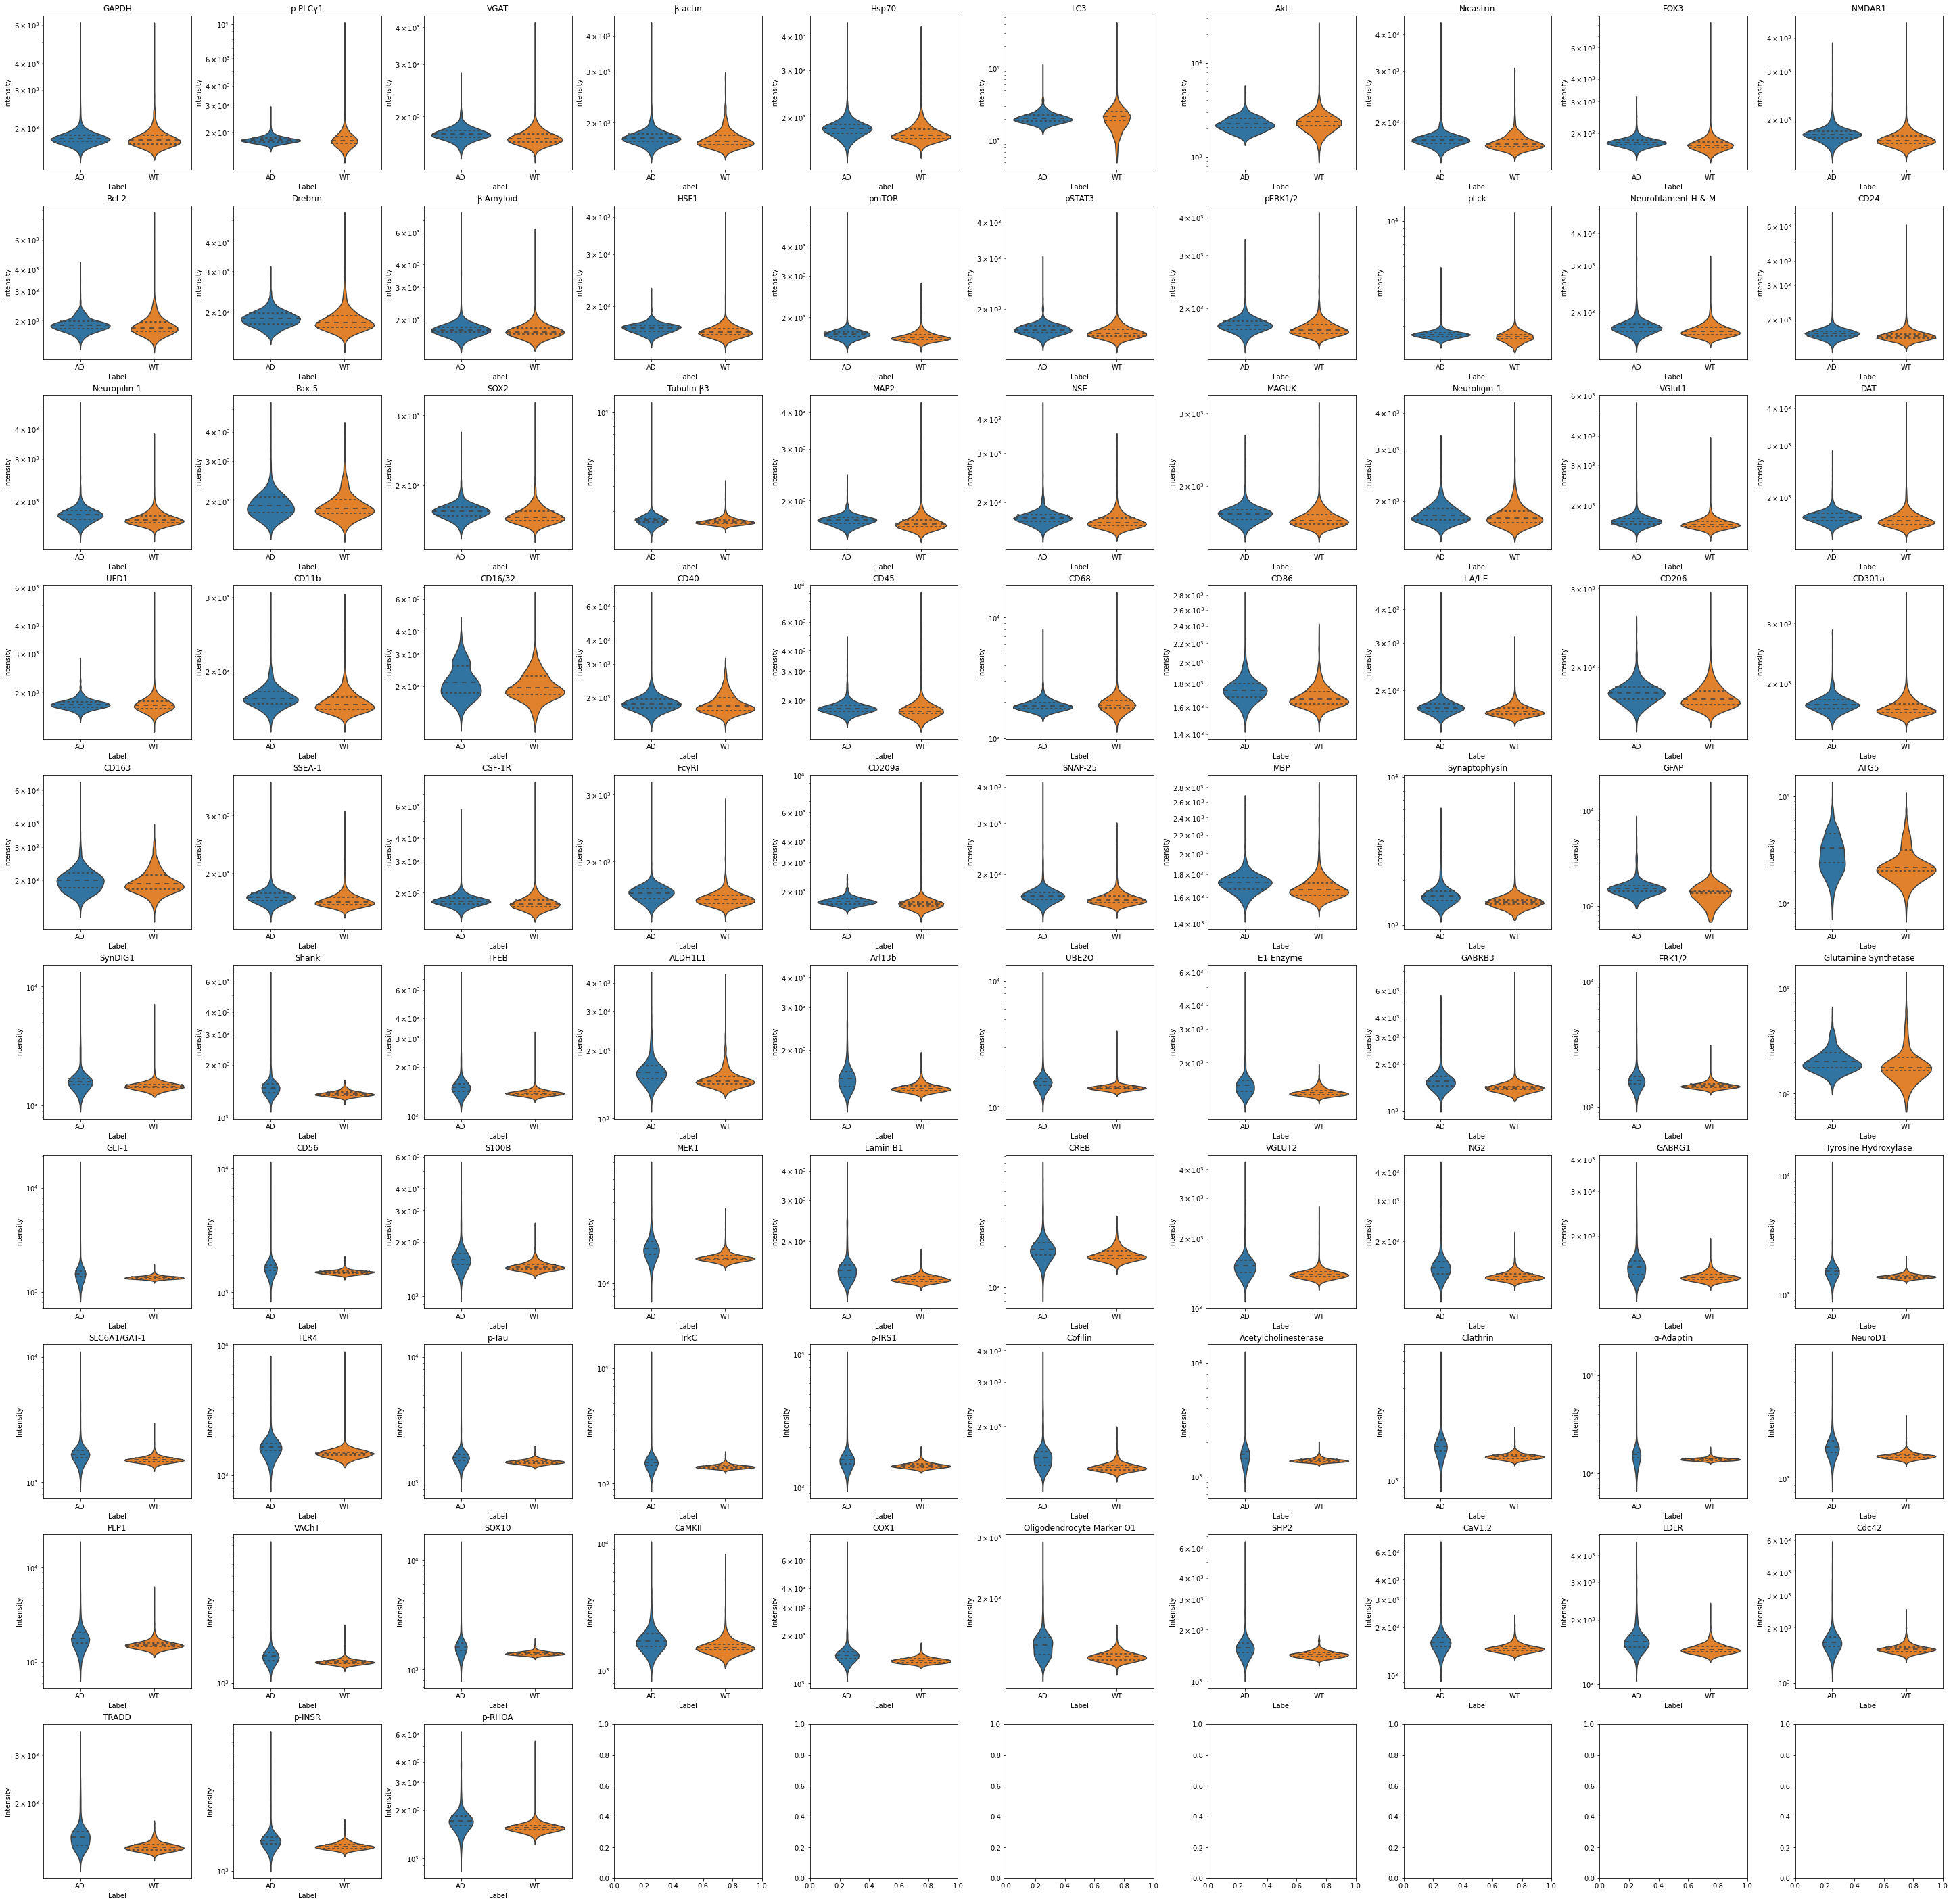

In [19]:
fig, axes = plt.subplots(nrows=10, ncols=10, constrained_layout=True, figsize=(40, 39))

num_proteins1 = 93
for i, ax in zip(range(num_proteins1), axes.flatten()):
    protein = new_col[i]
    stripplot_df = make_stripplot_df(sc, [ad_thresh, wt_thresh], protein)
    filtered_violin = remove_outliers(stripplot_df)
    filtered_violin['Intensity'] = filtered_violin['Intensity'].astype('float64')
    ax.set_yscale('log')
    sns.violinplot(x='Label', y='Intensity', data=filtered_violin, ax=ax, inner='quartile').set_title(protein)

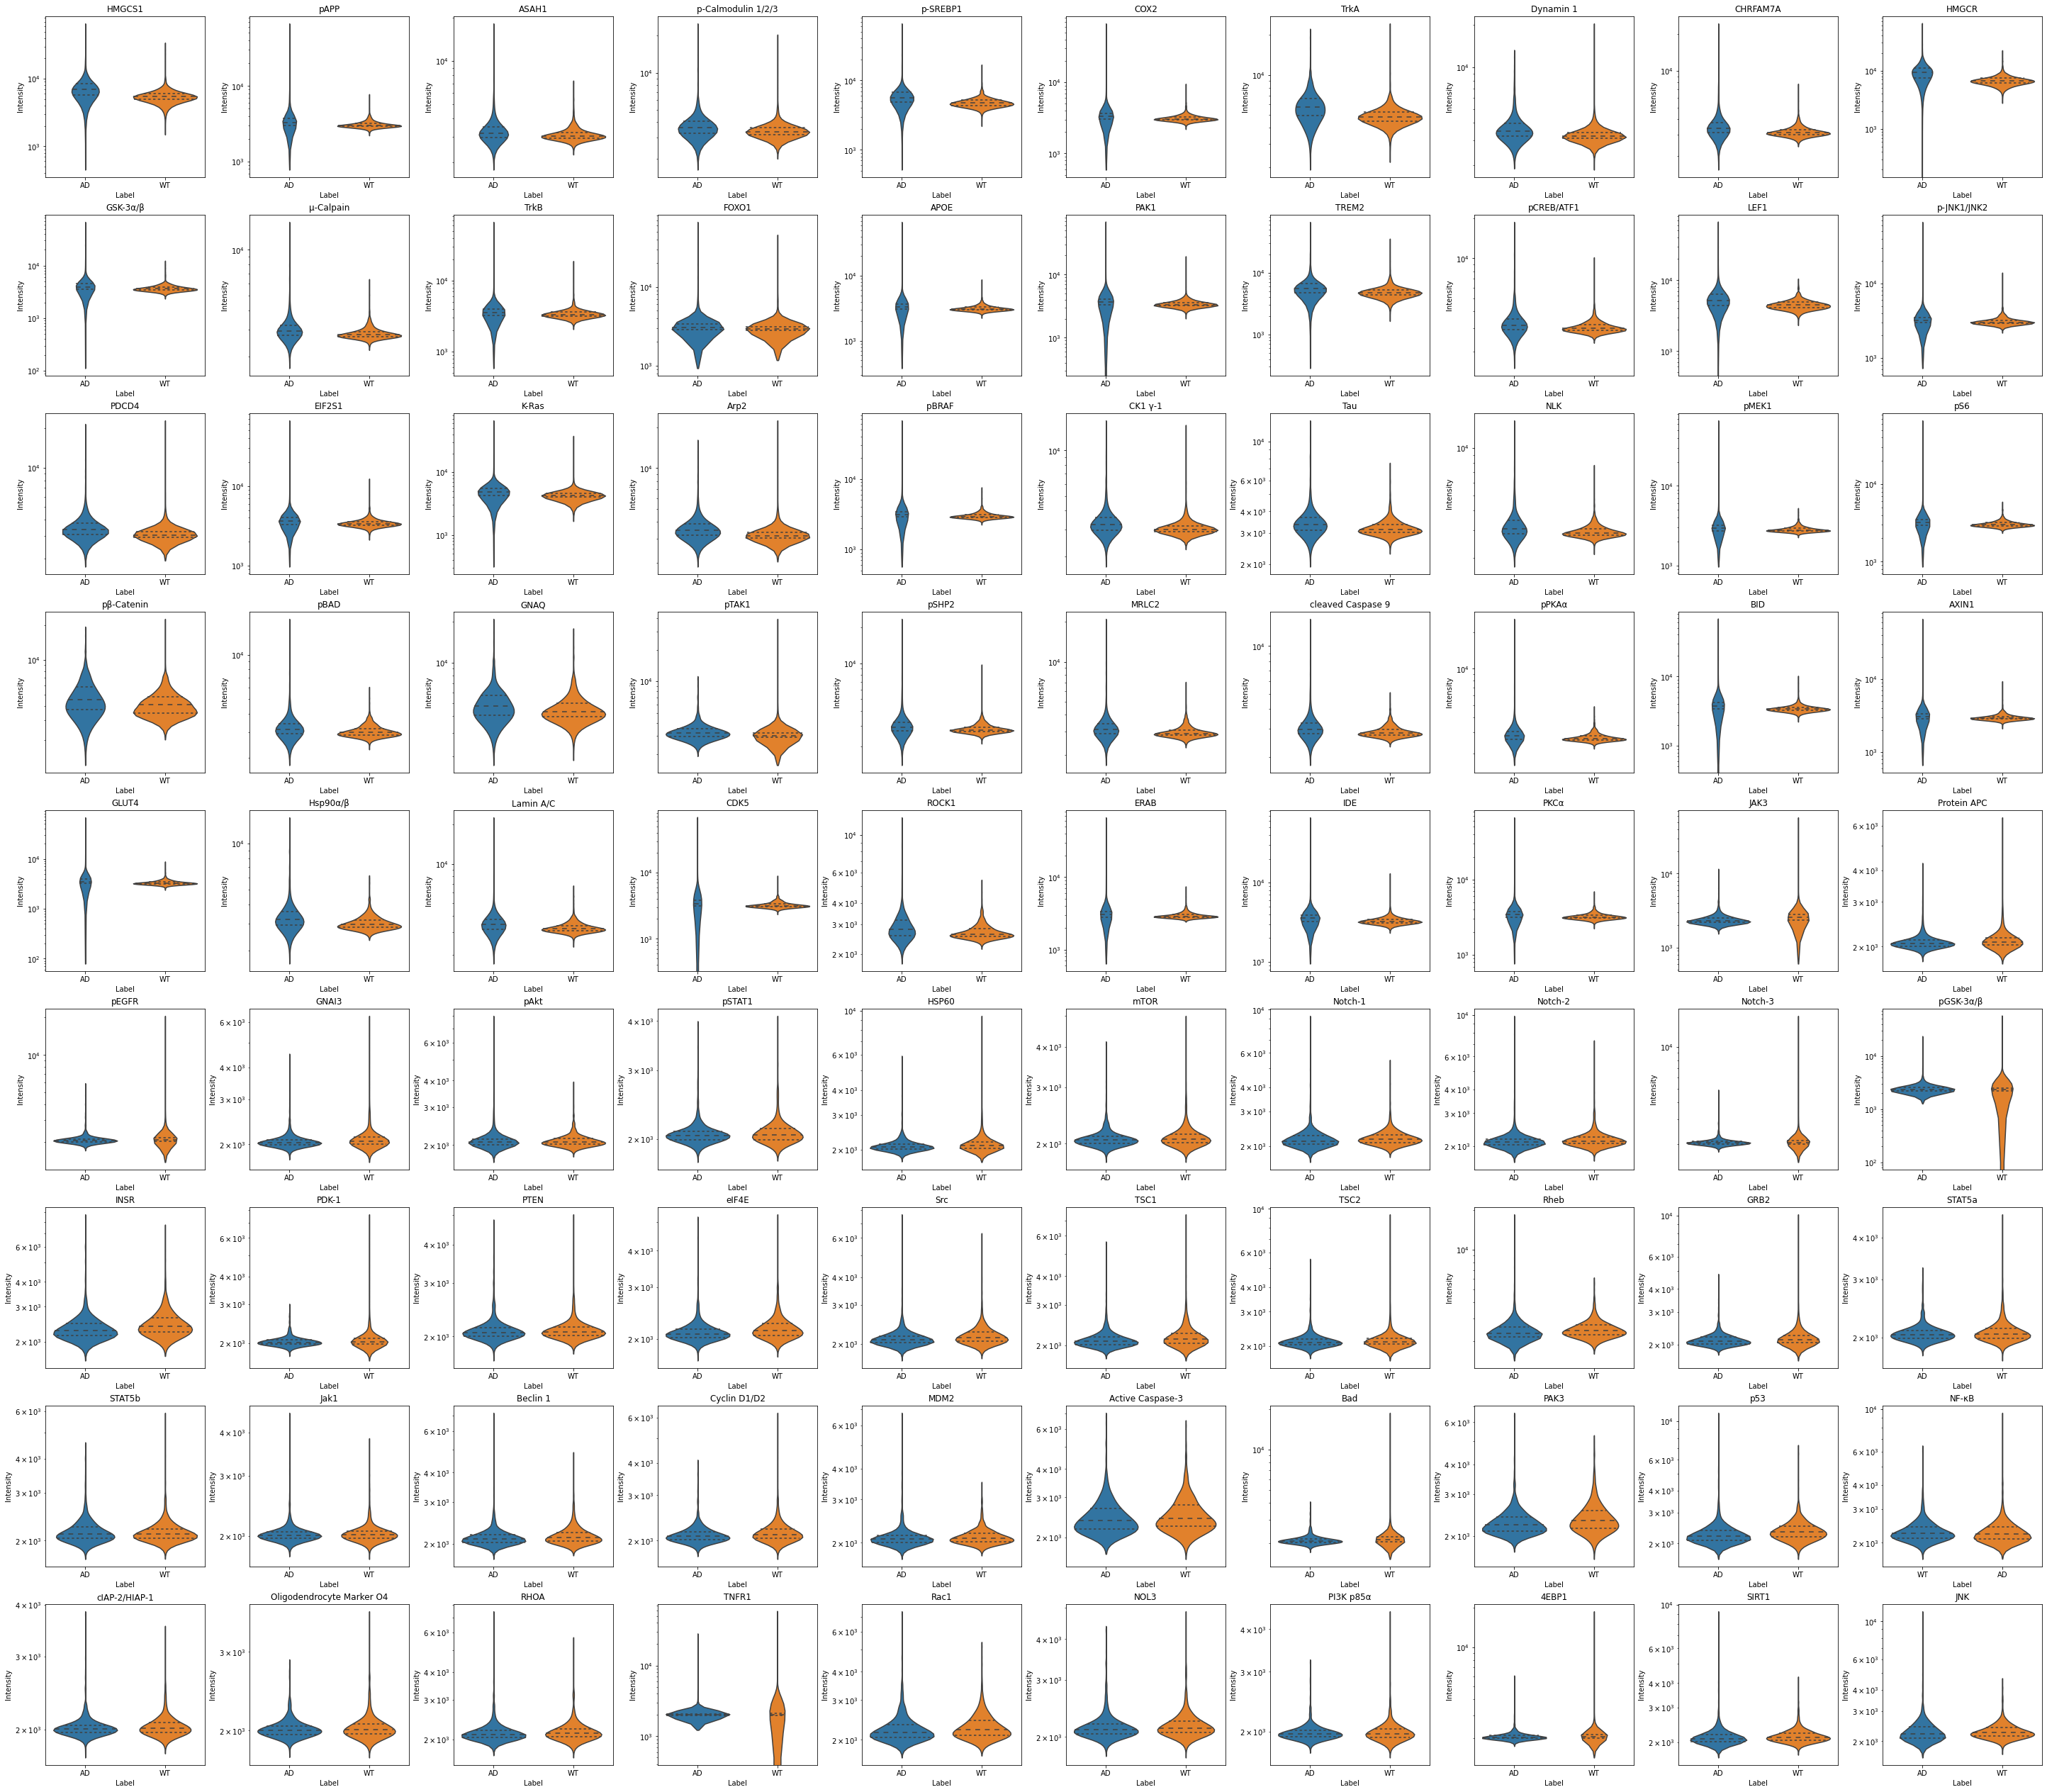

In [20]:
fig, axes = plt.subplots(nrows=9, ncols=10, constrained_layout=True, figsize=(40, 35))

num_proteins2 = 90
for i, ax in zip(range(num_proteins2), axes.flatten()):
    protein = new_col[i+93]
    stripplot_df = make_stripplot_df(sc, [ad_thresh, wt_thresh], protein)
    filtered_violin = remove_outliers(stripplot_df)
    filtered_violin['Intensity'] = filtered_violin['Intensity'].astype('float64')
    ax.set_yscale('log')
    sns.violinplot(x='Label', y='Intensity', data=filtered_violin, ax=ax, inner='quartile').set_title(protein)

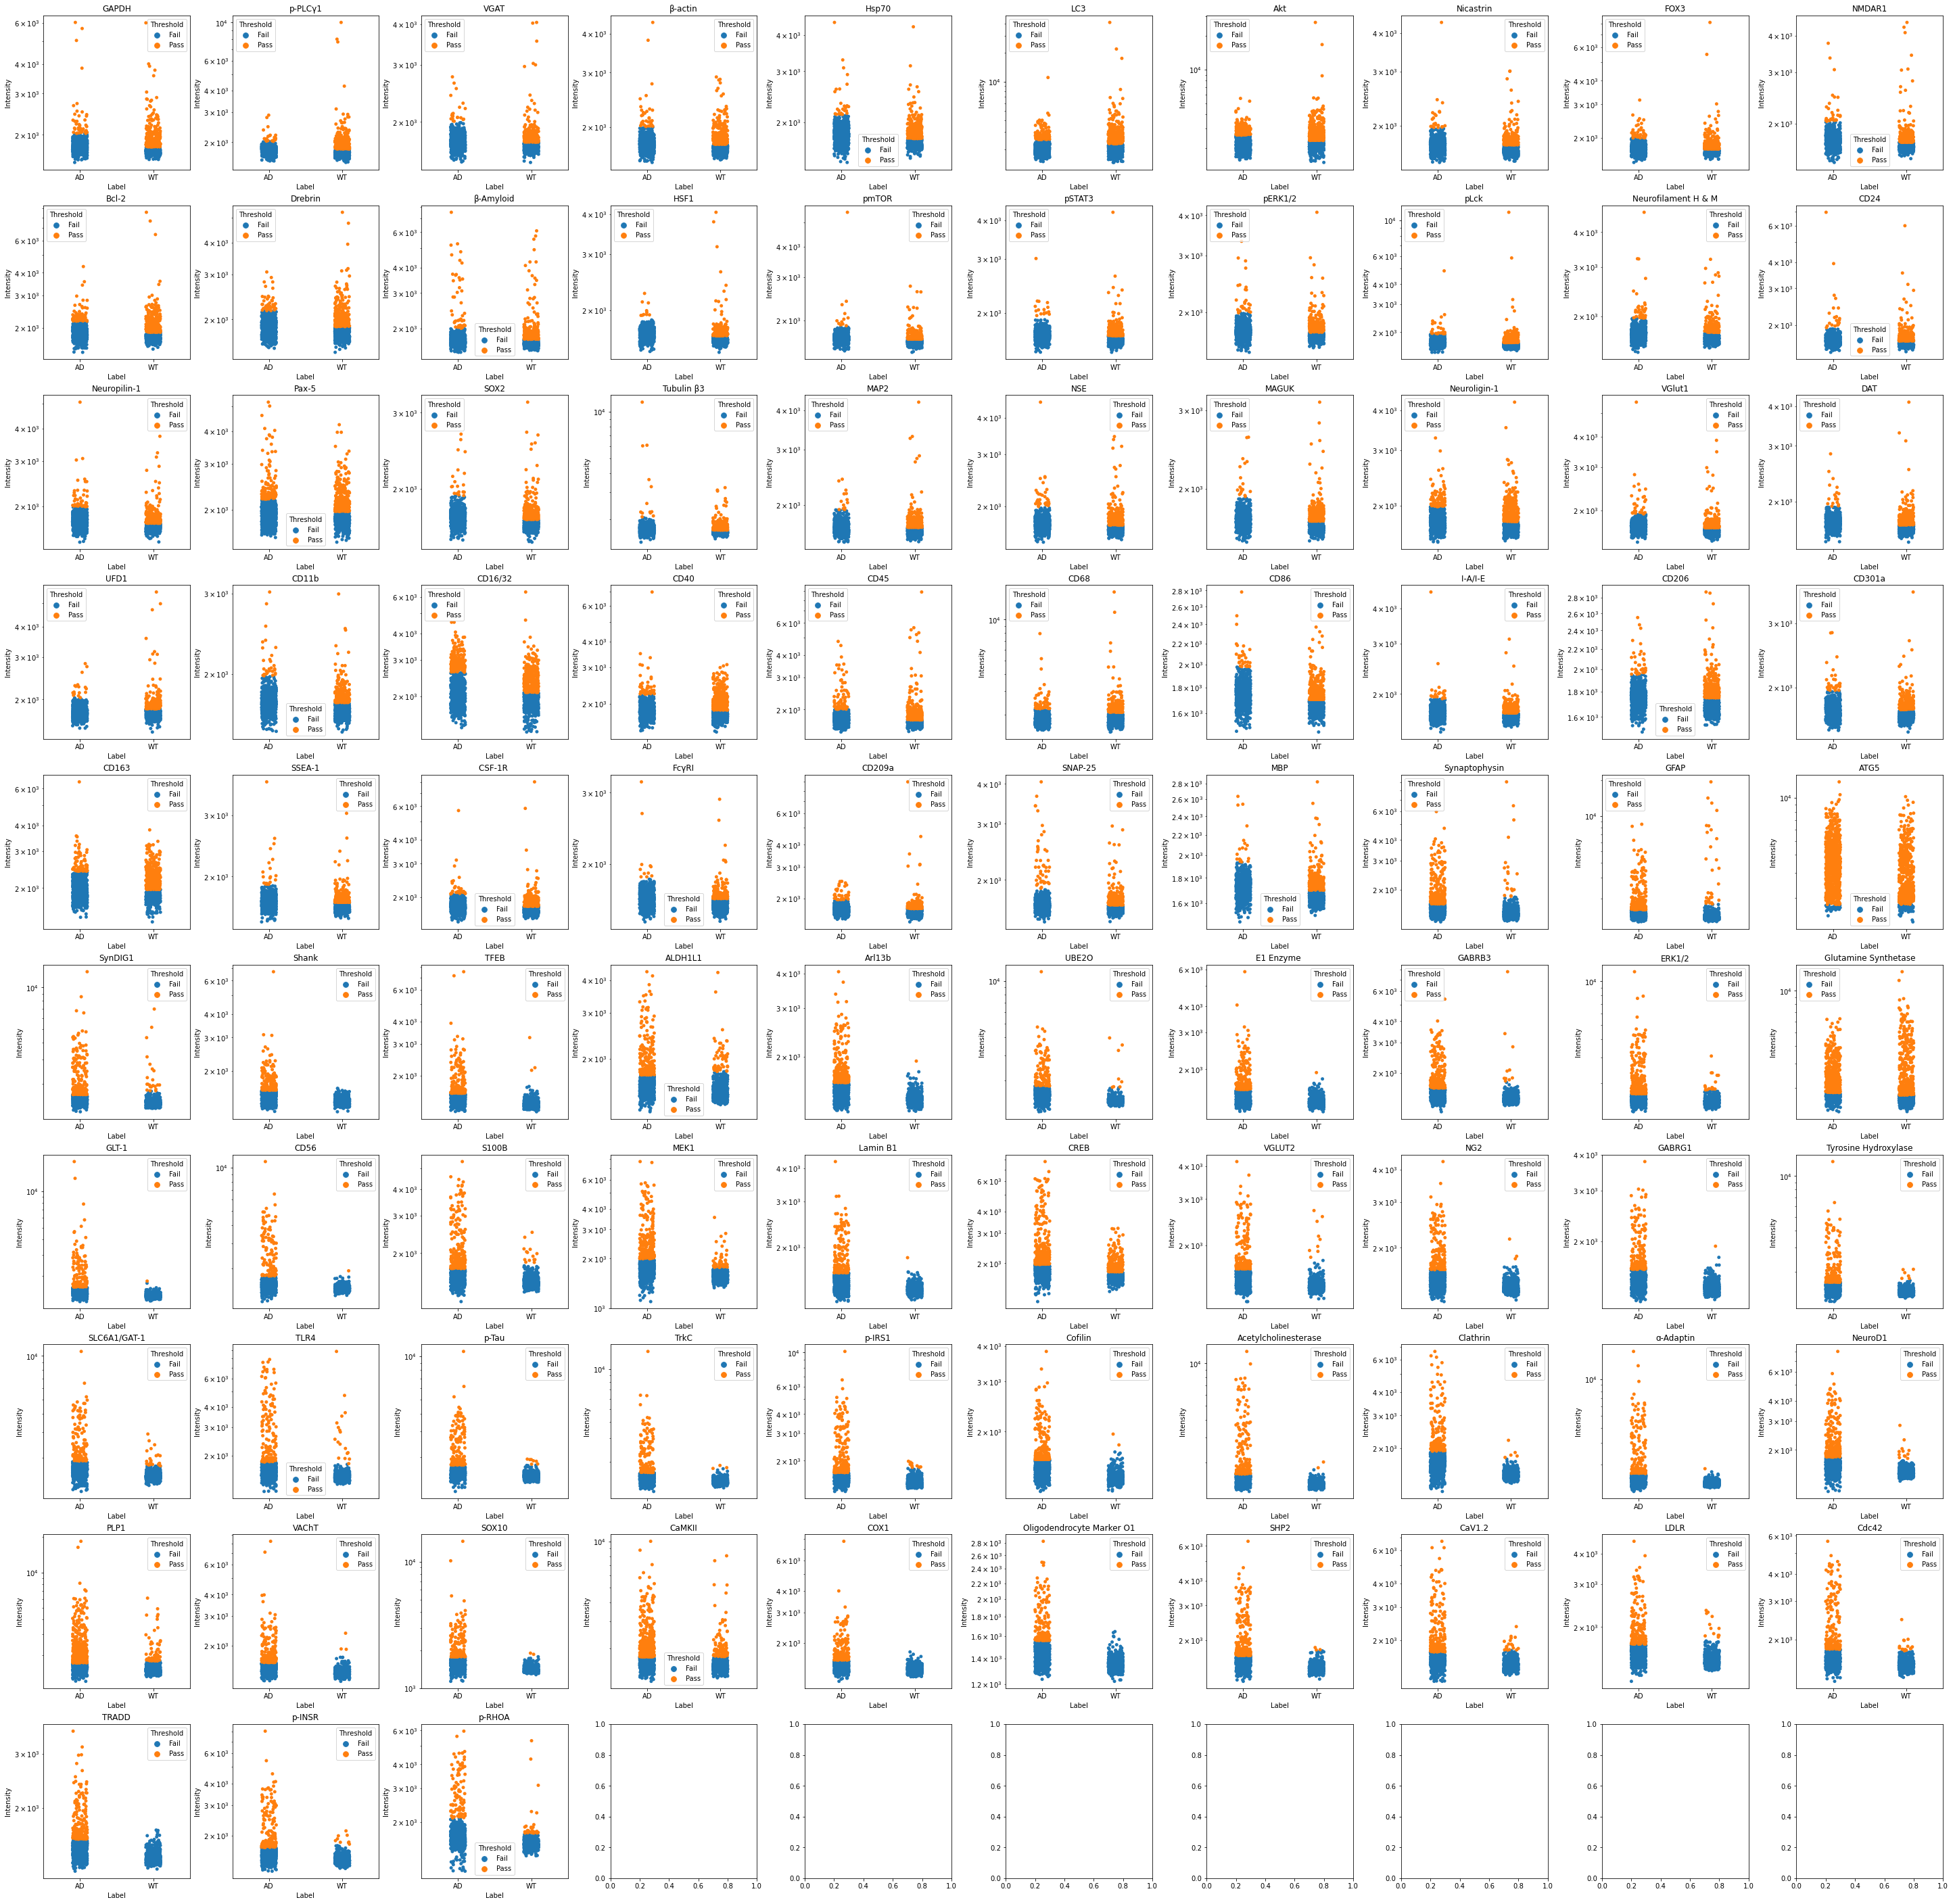

In [21]:
fig, axes = plt.subplots(nrows=10, ncols=10, constrained_layout=True, figsize=(40, 39))

num_proteins1 = 93
for i, ax in zip(range(num_proteins1), axes.flatten()):
    protein = new_col[i]
    stripplot_df = make_stripplot_df(sc, [ad_thresh, wt_thresh], protein)
    filtered_stripplot = remove_outliers(stripplot_df)
    ax.set_yscale('log')
    sns.stripplot(x='Label', y='Intensity', hue='Threshold', data=filtered_stripplot, ax=ax).set_title(protein)

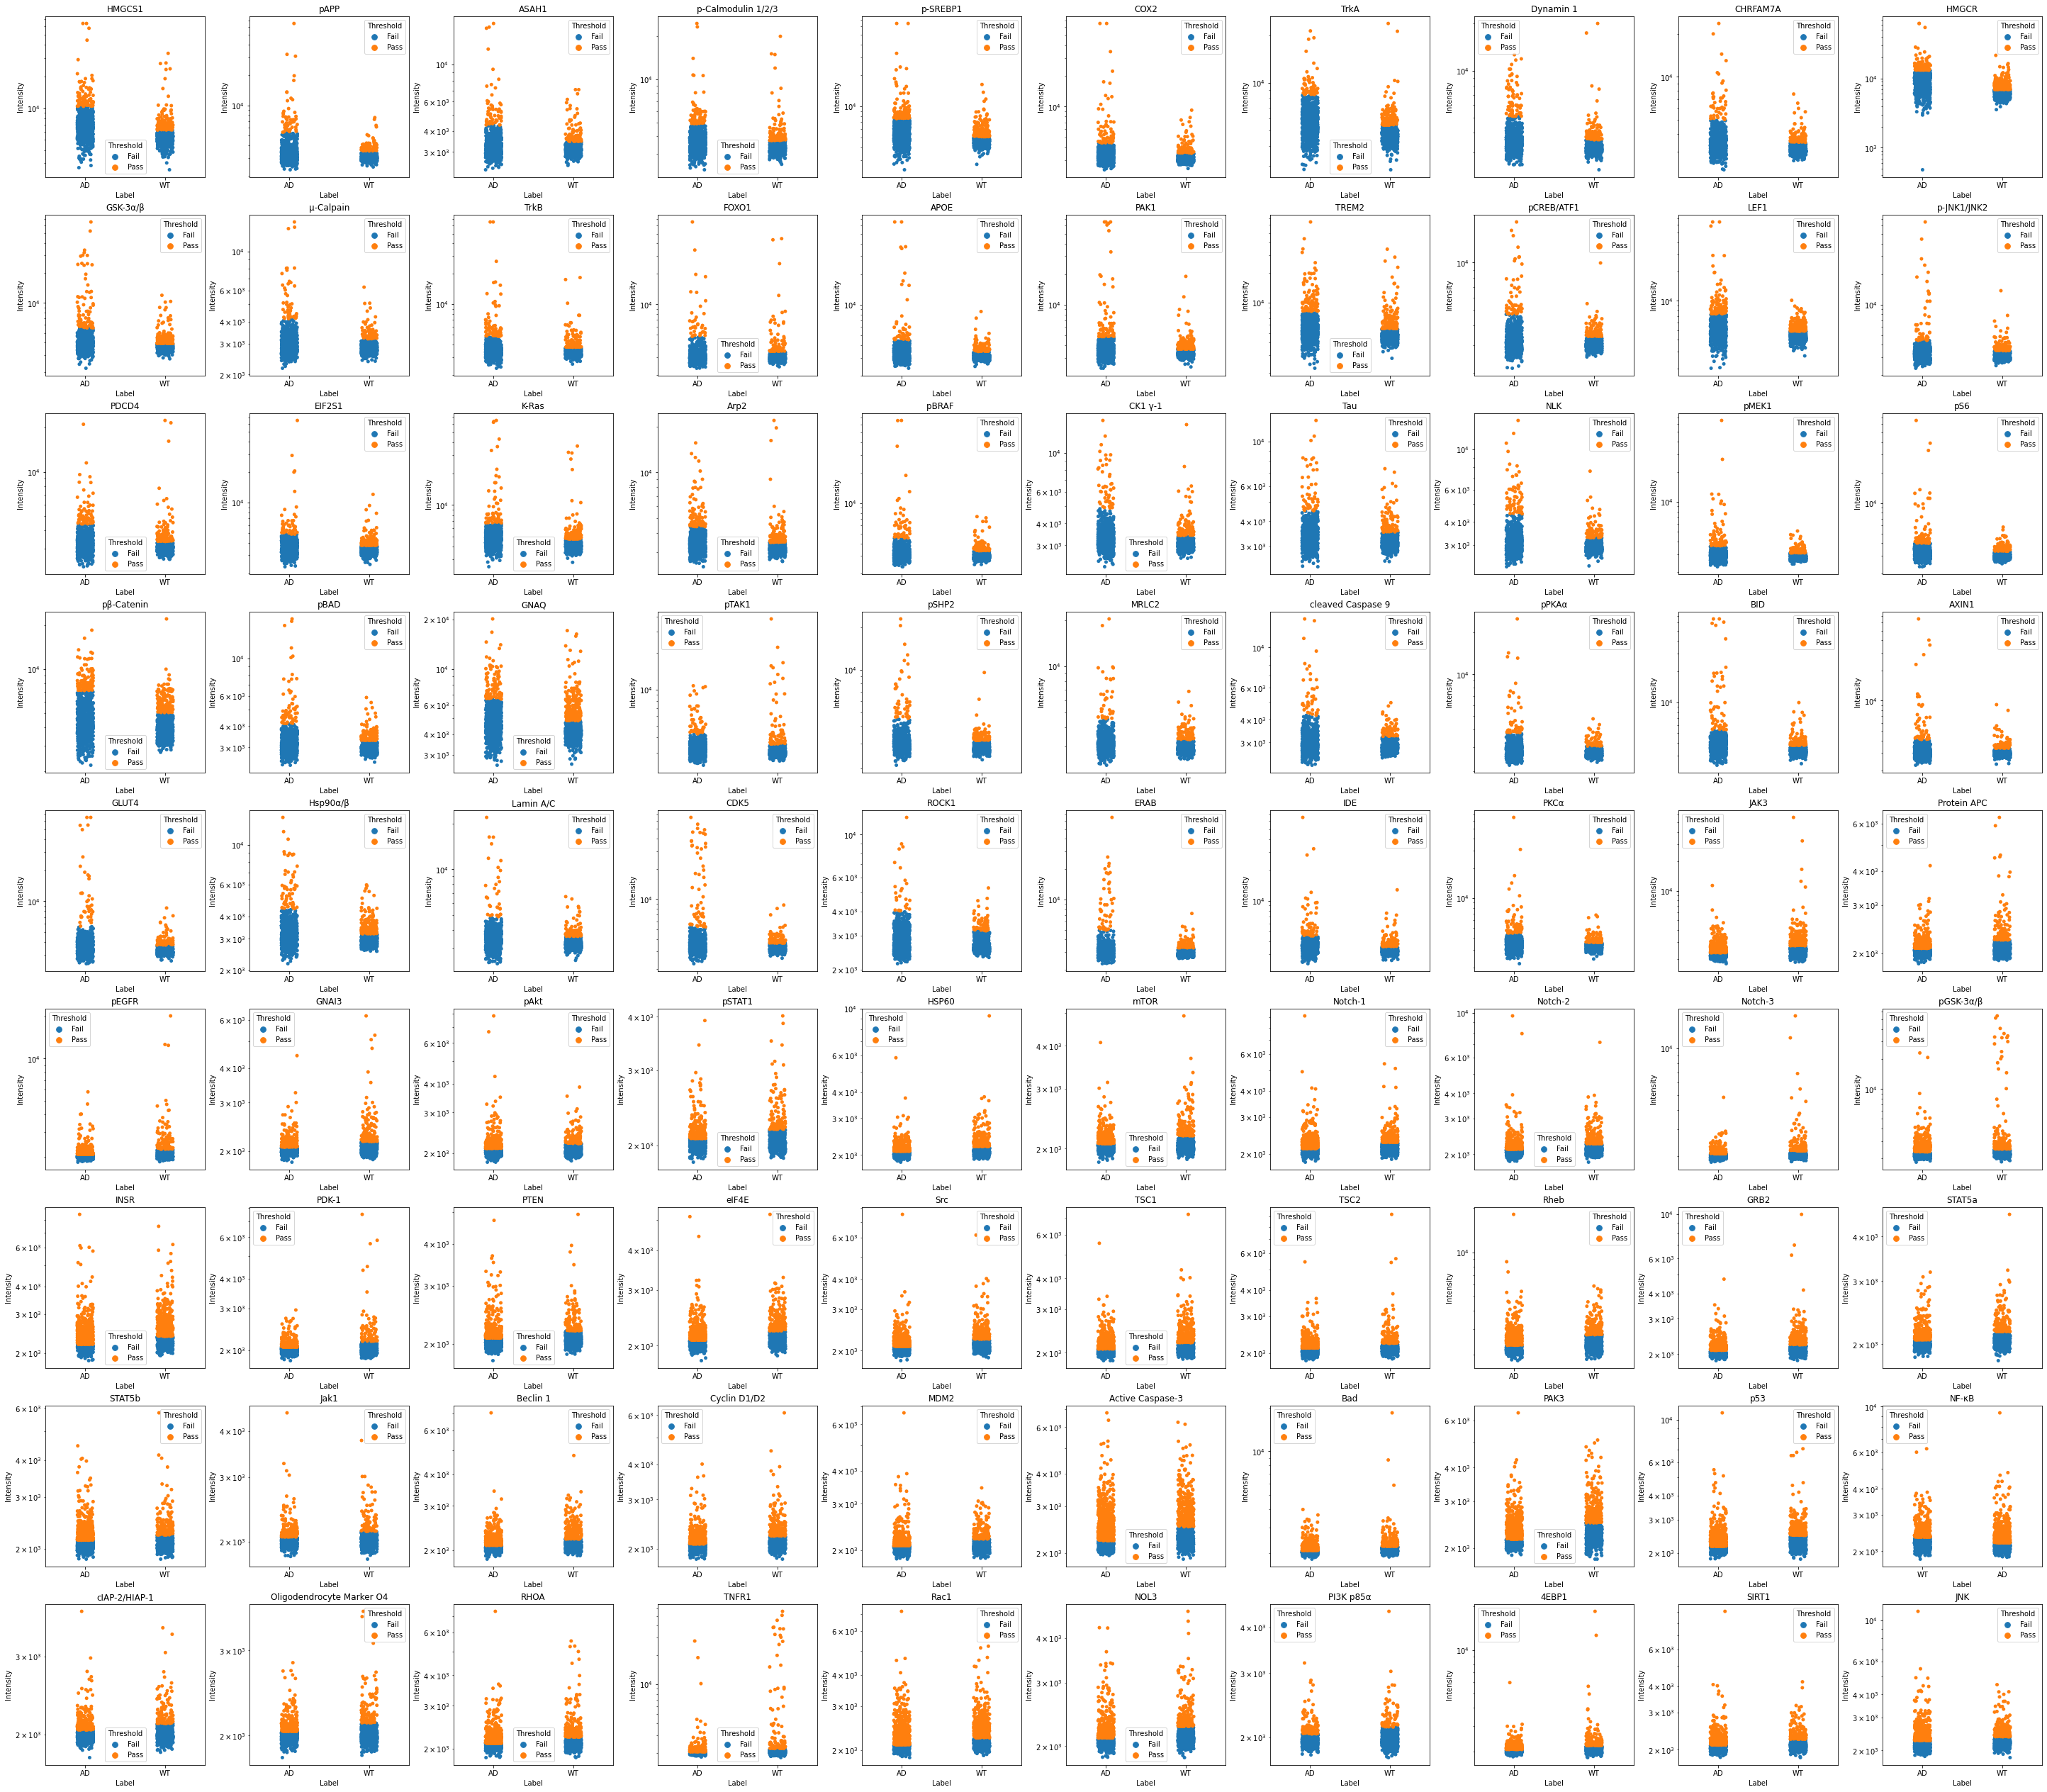

In [22]:
fig, axes = plt.subplots(nrows=9, ncols=10, constrained_layout=True, figsize=(40, 35))

num_proteins2 = 90
for i, ax in zip(range(num_proteins2), axes.flatten()):
    protein = new_col[i+93]
    stripplot_df = make_stripplot_df(sc, [ad_thresh, wt_thresh], protein)
    filtered_stripplot = remove_outliers(stripplot_df)
    ax.set_yscale('log')
    sns.stripplot(x='Label', y='Intensity', hue='Threshold', data=filtered_stripplot, ax=ax).set_title(protein)

In [23]:
# fig, axes = plt.subplots(nrows=20, ncols=10, constrained_layout=True, figsize=(26, 40))
# axes_list = [item for sublist in axes for item in sublist]

# num_proteins = len(new_col)
# for i in range(num_proteins):
#     protein = new_col[i]
#     labeled_threshold = label_threshold(threshold_df, protein)
#     make_many_umap(labeled_threshold, i, axes_list)

In [24]:
# def sc_from_sf(xlsx_data):
#     # getting single cell data from 'row' column by using the fill colors

#     sf = StyleFrame.read_excel(xlsx_data, read_style=True, use_openpyxl_styles=True)

#     df = sf.data_df
#     x = list(df['Row'])

#     row = sf['Row'][0:len(sf['Row'])-2]  # removes total sc on the bottom

#     y = df['Row'].astype(str)

#     yellow = 'FFFFFF00'
#     green = 'FF92D050'
#     red = 'FFFF0000'
#     sub = []

#     for i in range(len(row)):
#         row_bgcolor = row[i].style.fill.start_color.index
#         if row_bgcolor == yellow:
#             sub.append(y[i])

#     temp = pd.DataFrame(sub, columns=['Row'])
#     singlecells = pd.DataFrame(columns=df.columns)

#     for i in range(len(temp['Row'])):
#         row = df.loc[df['Row'] == temp['Row'][i]]
#         singlecells = singlecells.append(row, ignore_index=True)
    
#     singlecells = singlecells.drop(columns='Row')
#     singlecells = singlecells.astype(float)

#     return singlecells

In [25]:
# # make dataframe with proteins as labels

# def protein_df(sc_data):
#     # sc_data is a list of all the data
#     # removes rows w/ no data

#     num_data = len(sc_data)
#     protein_name = sc_data[0].columns
#     num_protein = len(protein_name)

#     column = ['Label']
#     for i in range(num_data):
#         column.append('Data' + str(i+1))

#     df = pd.DataFrame(columns=column)


#     for j in range(num_protein):

#         if j == 0:
#             check = []
#             for k in range(num_data):
#                 check.append(len(sc_data[k][protein_name[j]]))
#             min_num_rows = min(check)

#         for i in range(min_num_rows):
#             df = df.append({'Label': protein_name[j]}, ignore_index=True)

#     for j in range(num_data):
#         n_col = len(sc_data[j].columns)
#         place = 0
#         for i in range(n_col):
#             df[df.columns[j+1]][place:place+min_num_rows] = sc_data[j][sc_data[j].columns[i]][0:min_num_rows]
#             place += min_num_rows

#     return df

In [26]:
# data = 'AD chip 1.xlsx'
# allData = pd.read_excel(data)

In [27]:
# allDatafiltered = allData.drop(columns=error)
# allDatafiltered = allDatafiltered.drop(columns=['Cell number', 'Row'])

# for x in range(len(allDatafiltered.columns)):
#     col = allDatafiltered.columns[x]
#     allDatafiltered[col] = allDatafiltered[col].astype('float64')

# allData_T = allDatafiltered.T
# allData_T

In [28]:
# allData_T.to_excel('AD1_T_filtered.xlsx')